# CHURNLYTICAL_Exploratory_Data_Analysis
# (TELECOM_CHURN_Data_Analysis_EDA)


## Getting Started

- The dataset contains customer information from a Telecom Company.
- It contains various atrributes such as customer charges, streaming services, internet services and so on...
- This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. It's intend is to find out the most striking behavior of customers through EDA and later on use some of the predictive techniques to determine on how we can retain the existing customers and also know the characteristics on why the customers are churning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("./Raw_Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.duplicated().sum()

0

- The dataset consists of 7043 rows and 21 columns
- There are no missing values in the dataset
- There are no duplicated values either

In [7]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges Column which should be numerical column is defined as object

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen column is a categorical feature, hence the percentile distribution is not proper
- 75% of customers have less than 55 months of tenure
- An average customer pays 64.76 USD as MonthlyCharges
- 25% of customers pay more than 89.85 USD as MonthlyCharges

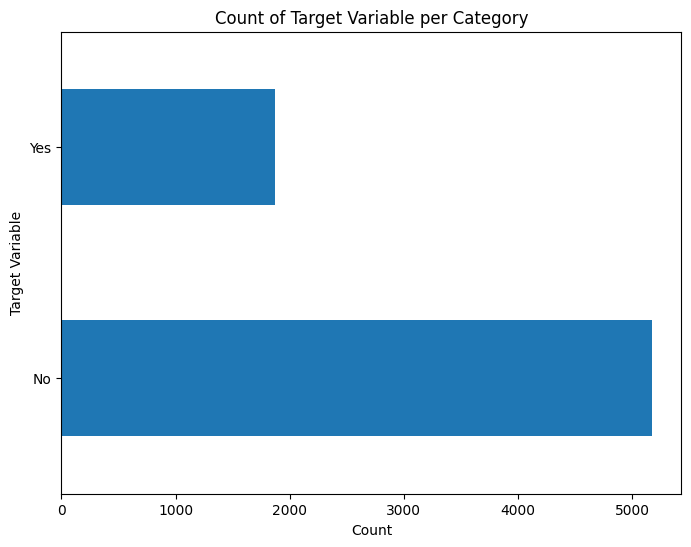

In [10]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of Target Variable per Category");

In [11]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
100 * data['Churn'].value_counts()/len(data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

- There are 5174 churners and 1869 non-churners which proves that Churn column is not balanced.
- This means that the dataset is highly imbalanced, ratio = 73:26

## Data Cleaning & Pre-processing

1. Creating a copy of base data for manipulation and processing

In [13]:
data1 = data.copy()

2. TotalCharges is defined as an object but it should be numerical, so let's convert it

In [14]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors='coerce')

# now let's check the null values
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. After typecasting, we can see that there are 11 missing values in the TotalCharges column, let's check those records

In [15]:
data1.loc[data1['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Imputation of missing values:<br>
Since the % of these records compared to the total dataset is very low, it is safe to ignore them from further processing

In [16]:
data1.dropna(how='any', inplace=True)

5. Typecast SeniorCitizen column to categorical column

In [17]:
data1.SeniorCitizen = data1['SeniorCitizen'].map({0:'No', 1:'Yes'})

6. Dividing customers into bins based on tenure:<br>
For instance, 1-12 for customers having tenure less than 12 months and so on...

In [18]:
# max tenure
print(data1.tenure.max())

72


In [19]:
# grouping the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data1['tenure_group'] = pd.cut(data1.tenure, bins=range(1, 80, 12), right=False, labels=labels).astype('object')

In [20]:
data1.tenure_group.value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

7. Remove columns not require for processing

In [21]:
# dropping tenure and customerID column
data1.drop(columns=['tenure', 'customerID'], axis=1, inplace=True)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


8. Looking for redundant values and removing them 

In [22]:
for col in data1.columns:
    print(col, data1[col].unique())

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']
tenure_group ['1 - 12' '25 - 36' '37 - 48' '13 - 24' '61 - 72' '49 - 60']


- Let's look at MultipleLines attribute, it has three values namely - 'No phone service', 'Yes', 'No'<br>
 It's a redundant category because if the customer doesn't have phone service (PhoneService = 'No'), then they can't have multiple lines either as it requires phone service.
- This also applies to OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV & StreamingMovies attributes.
- The solution is to simple replace these categories with 'No', it helps in avoiding multicollinearity.

In [23]:
data1.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


9. Save modified dataset for model building

In [24]:
data1.to_csv('Churnlytical_DataBase.csv', index=False)

10. Convert target variable 'Churn' to binary i.e. 'Yes' => 1, 'No' => 0

In [25]:
data1['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)

C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\1624321128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\1624321128.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da

11. Convert all the categorical variables into dummy variables

In [26]:
data_dummies = pd.get_dummies(data1)
data_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


## Data Visualization & Analysis

1. Plot distribution of individual predictors by churn

C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\345401961.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data1, x=predictor, hue='Churn', palette=palette)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\345401961.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data1, x=predictor, hue='Churn', palette=palette)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\345401961.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data1, x=predictor, hue='Churn', palette=palette)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\345401961.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data1, x=predictor, hue='Churn', palette=palette)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipy

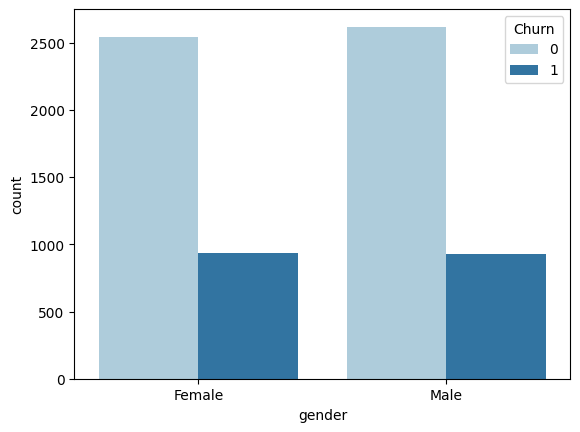

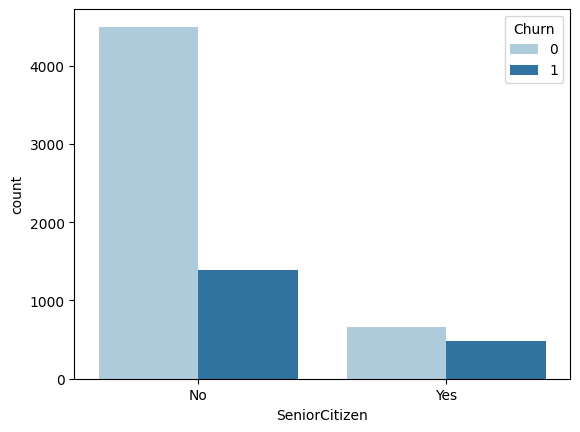

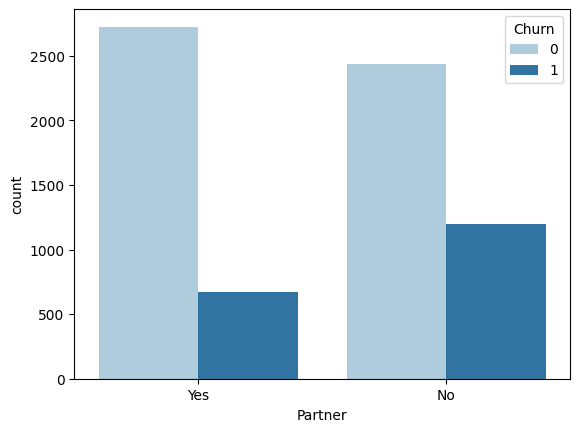

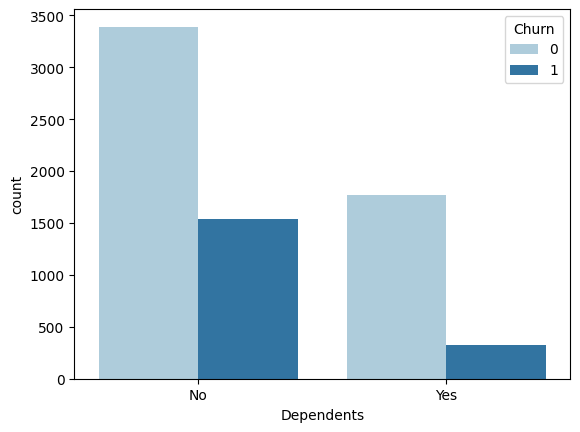

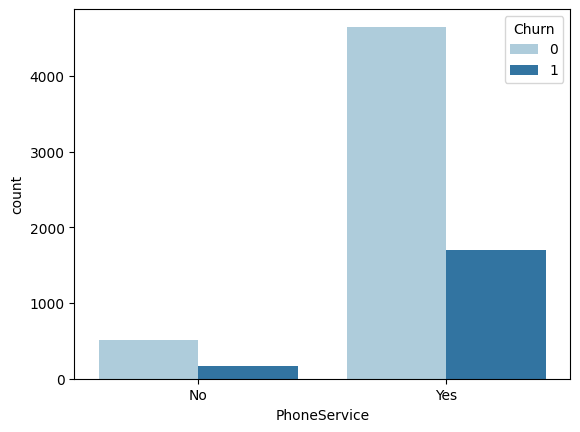

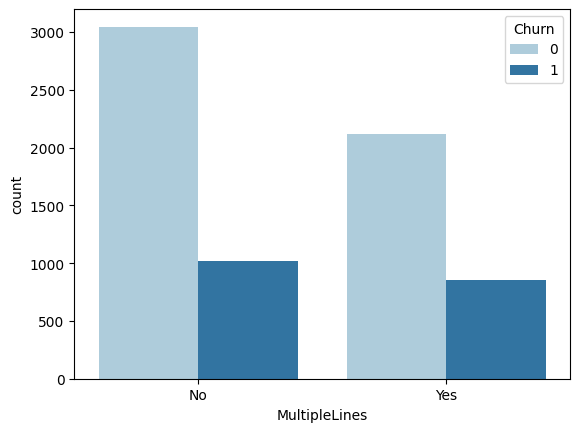

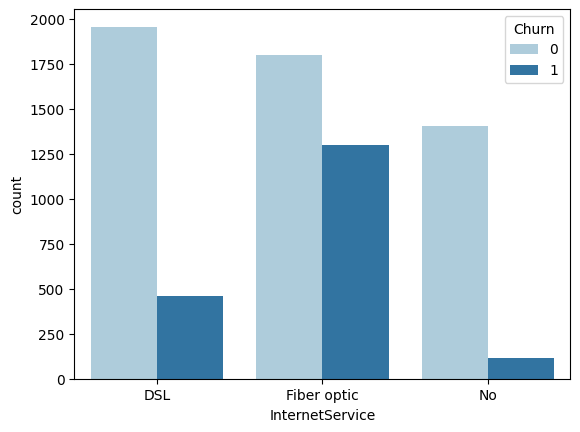

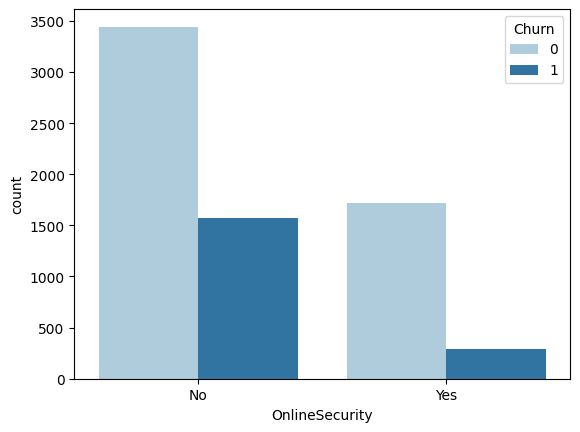

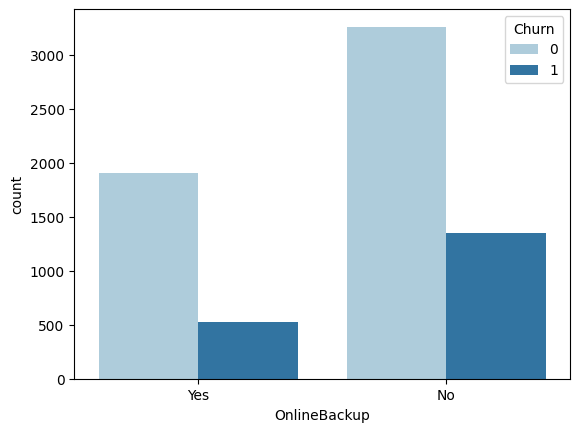

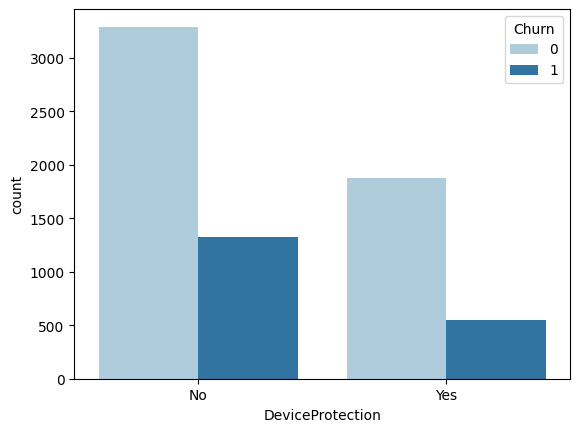

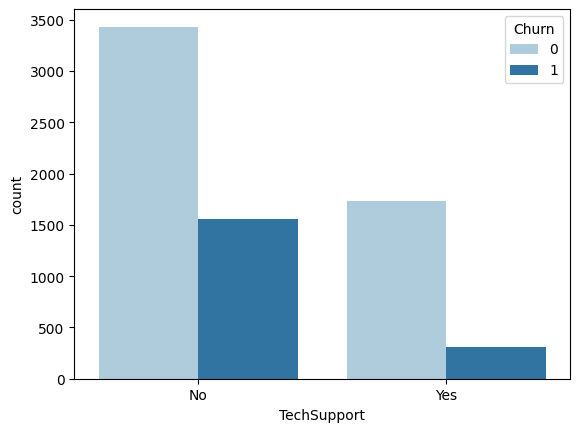

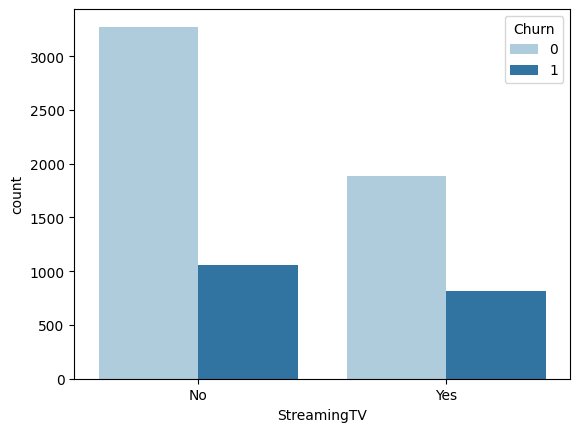

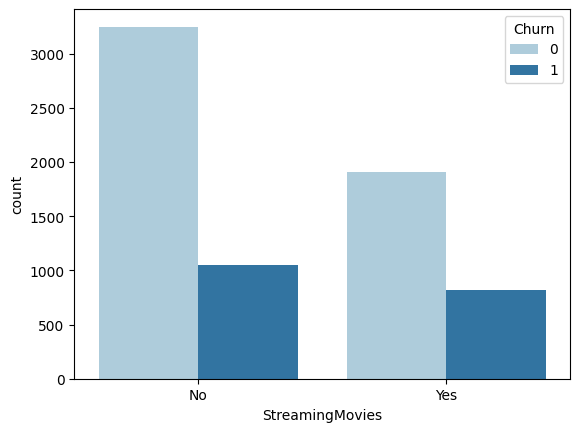

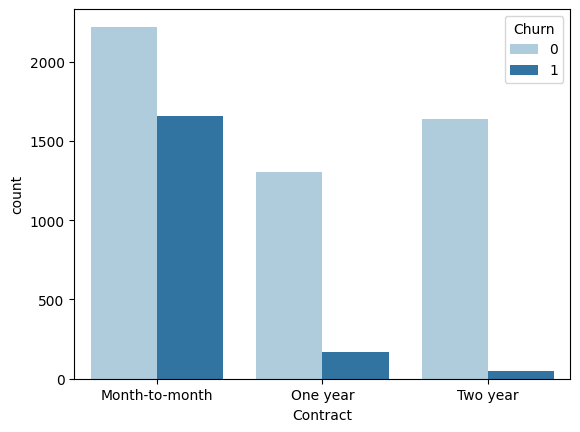

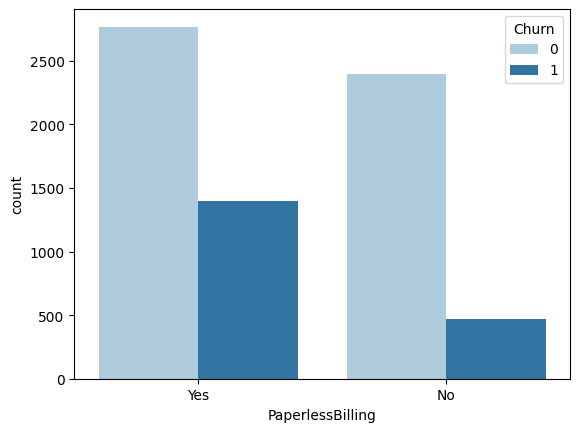

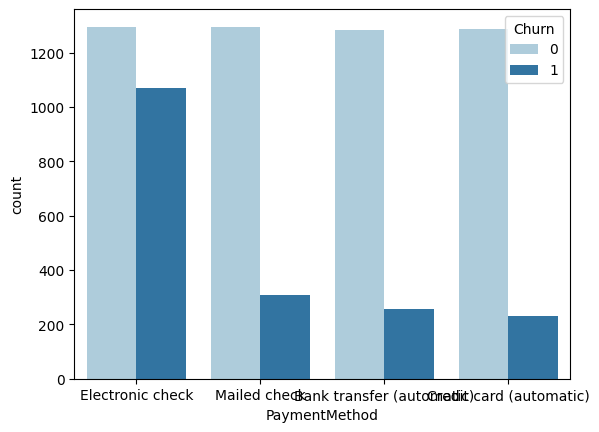

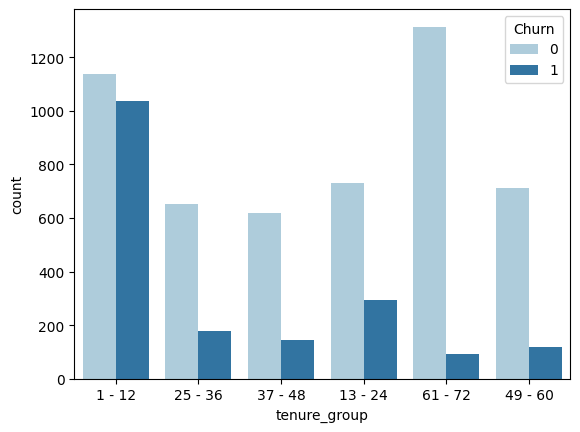

In [27]:
for i, predictor in enumerate(data1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])): #excluding numerical columns and target variable
    plt.figure(i)
    palette = sns.color_palette("Paired")
    sns.countplot(data=data1, x=predictor, hue='Churn', palette=palette)

2. Relationship between MonthlyCharges and TotalCharges

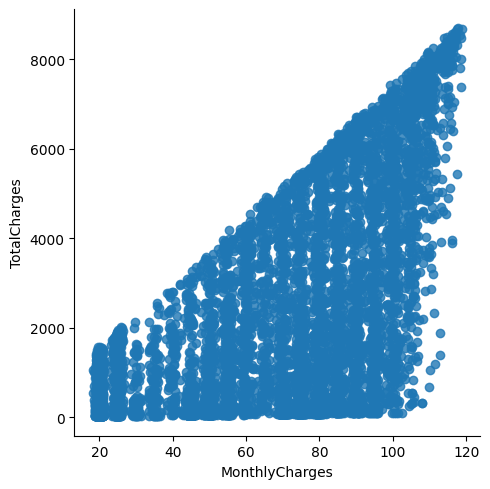

In [28]:
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False);

- As expected, TotalCharges increases with increase in MonthlyCharges.

3. Churn by MonthlyCharges and TotalCharges

C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\3665742801.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0)], color='Red', shade=True)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\3665742801.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1)], ax=mth, color='Blue', shade=True)


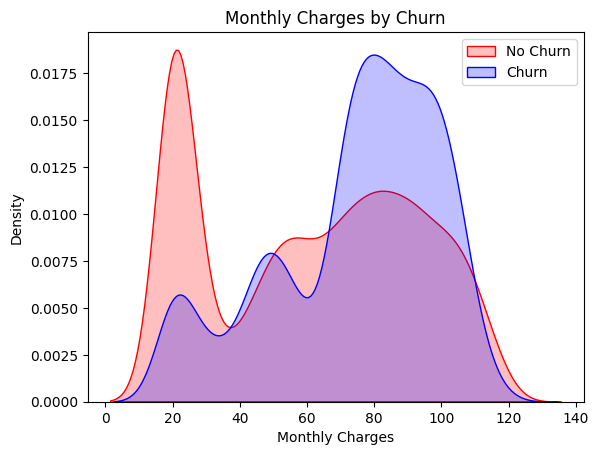

In [29]:
mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0)], color='Red', shade=True)
mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1)], ax=mth, color='Blue', shade=True)

mth.set_title("Monthly Charges by Churn")
mth.set_xlabel("Monthly Charges")
mth.set_ylabel("Density")
mth.legend(["No Churn", "Churn"], loc='upper right');

C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\3813359078.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ttl = sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn'] == 0)], color='Red', shade=True)
C:\Users\Ankita.Sahoo\AppData\Local\Temp\ipykernel_52216\3813359078.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ttl = sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn'] == 1)], ax=ttl, color='Blue', shade=True)


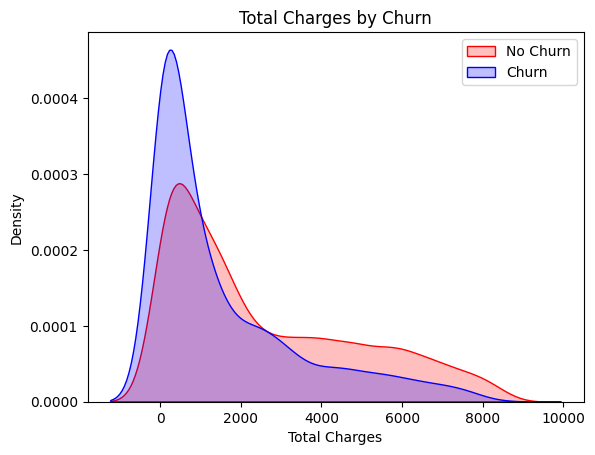

In [30]:
ttl = sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn'] == 0)], color='Red', shade=True)
ttl = sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn'] == 1)], ax=ttl, color='Blue', shade=True)

ttl.set_title("Total Charges by Churn")
ttl.set_xlabel("Total Charges")
ttl.set_ylabel("Density")
ttl.legend(["No Churn", "Churn"], loc='upper right');

Suprising insight as there is higher Churn at lower TotalCharges<br>
However if we combine the insights with other attributes i.e. Tenure, Monthly Charges & Total Charges, then the picture is bit clear:<br>
_Higher Monthly Charges at lower Tenure results in lower Total Charges._<br>
Hence, all these 3 factors viz __Higher Monthly Charge, Lower Tenure & Lower Total Charge are linked to High Churn__.

4. Build a correlation of all predictors with Churn

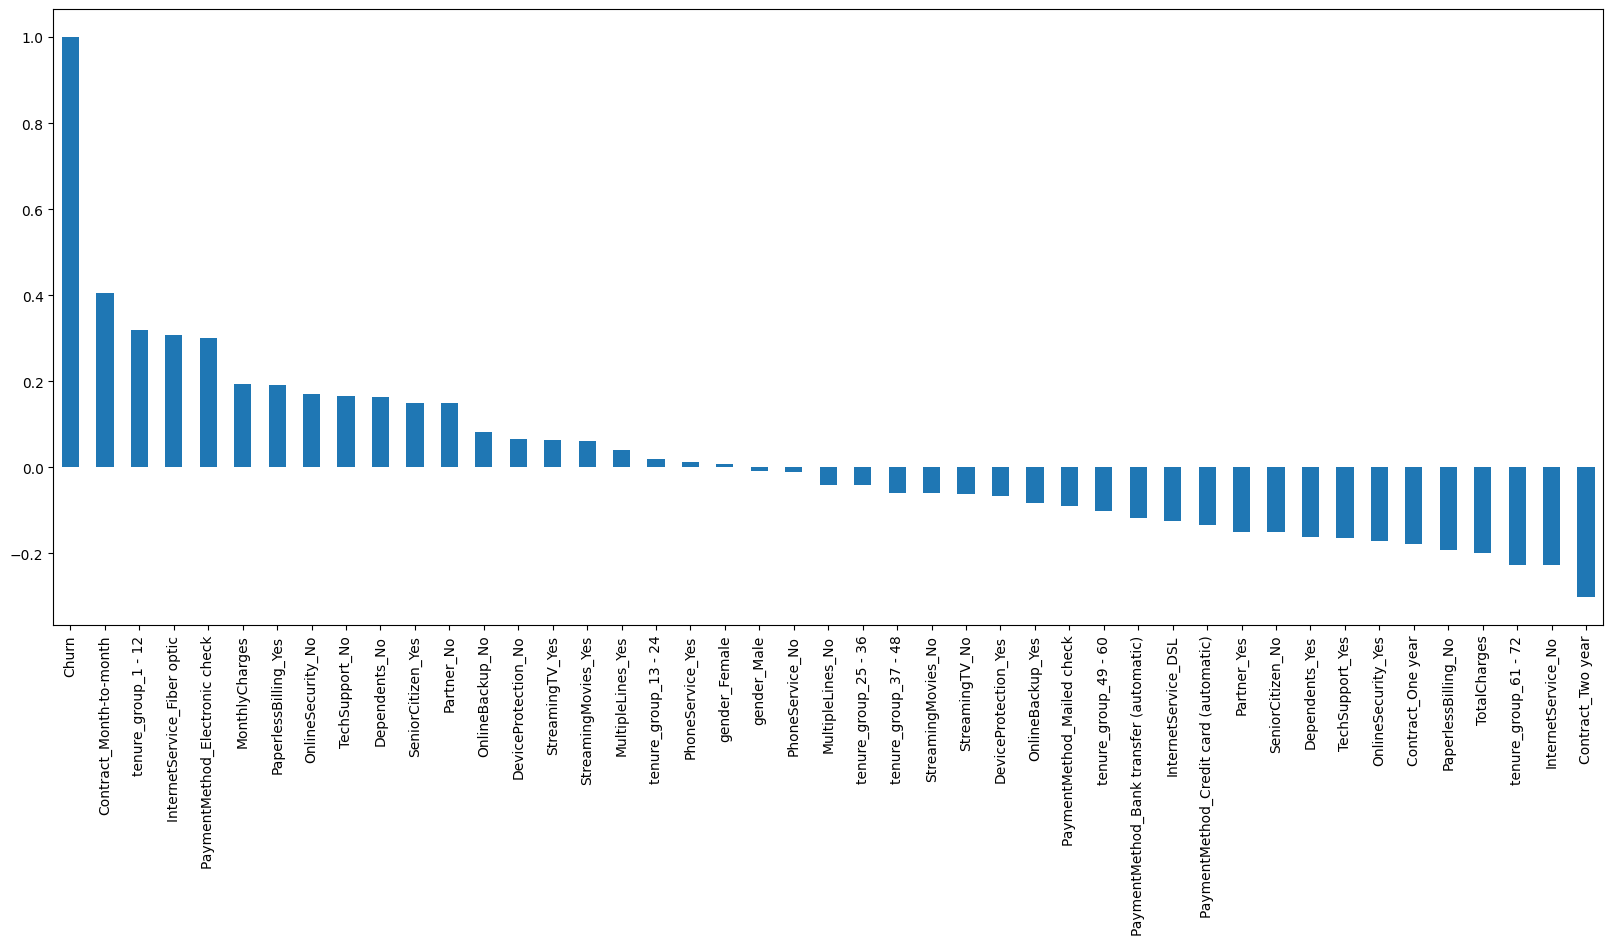

In [31]:
plt.figure(figsize=(20, 8))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

- High Churn seen in case of __Month to month contracts__, __No online security__, __No tech support__, __First year of subscription(tenure)__ & __Fibre optics internet__<br>
- Low Churn is seen in case of __Long term contracts__, __Subscriptions without internet service__ and __Customers who are engaged for 5+ years__<br>
- Factors like __Gender__, __Availability of phone service__ and __Customers with multiple lines__ have almost no impact on Churn<br>
This is also evident from the heatmap below

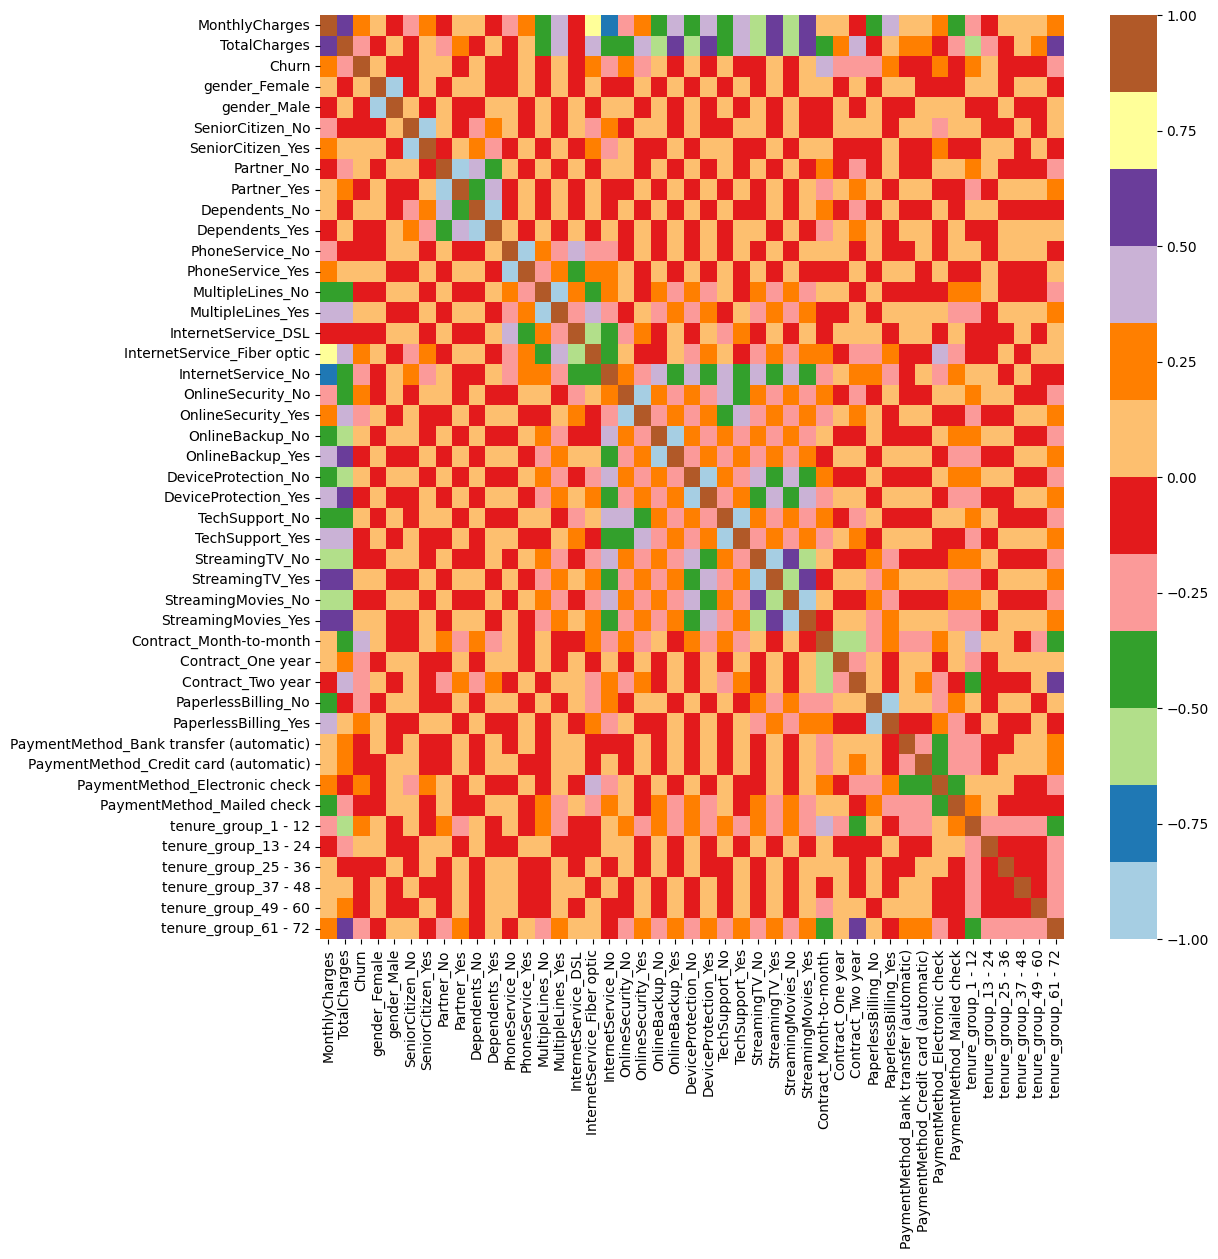

In [32]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_dummies.corr(), cmap="Paired");

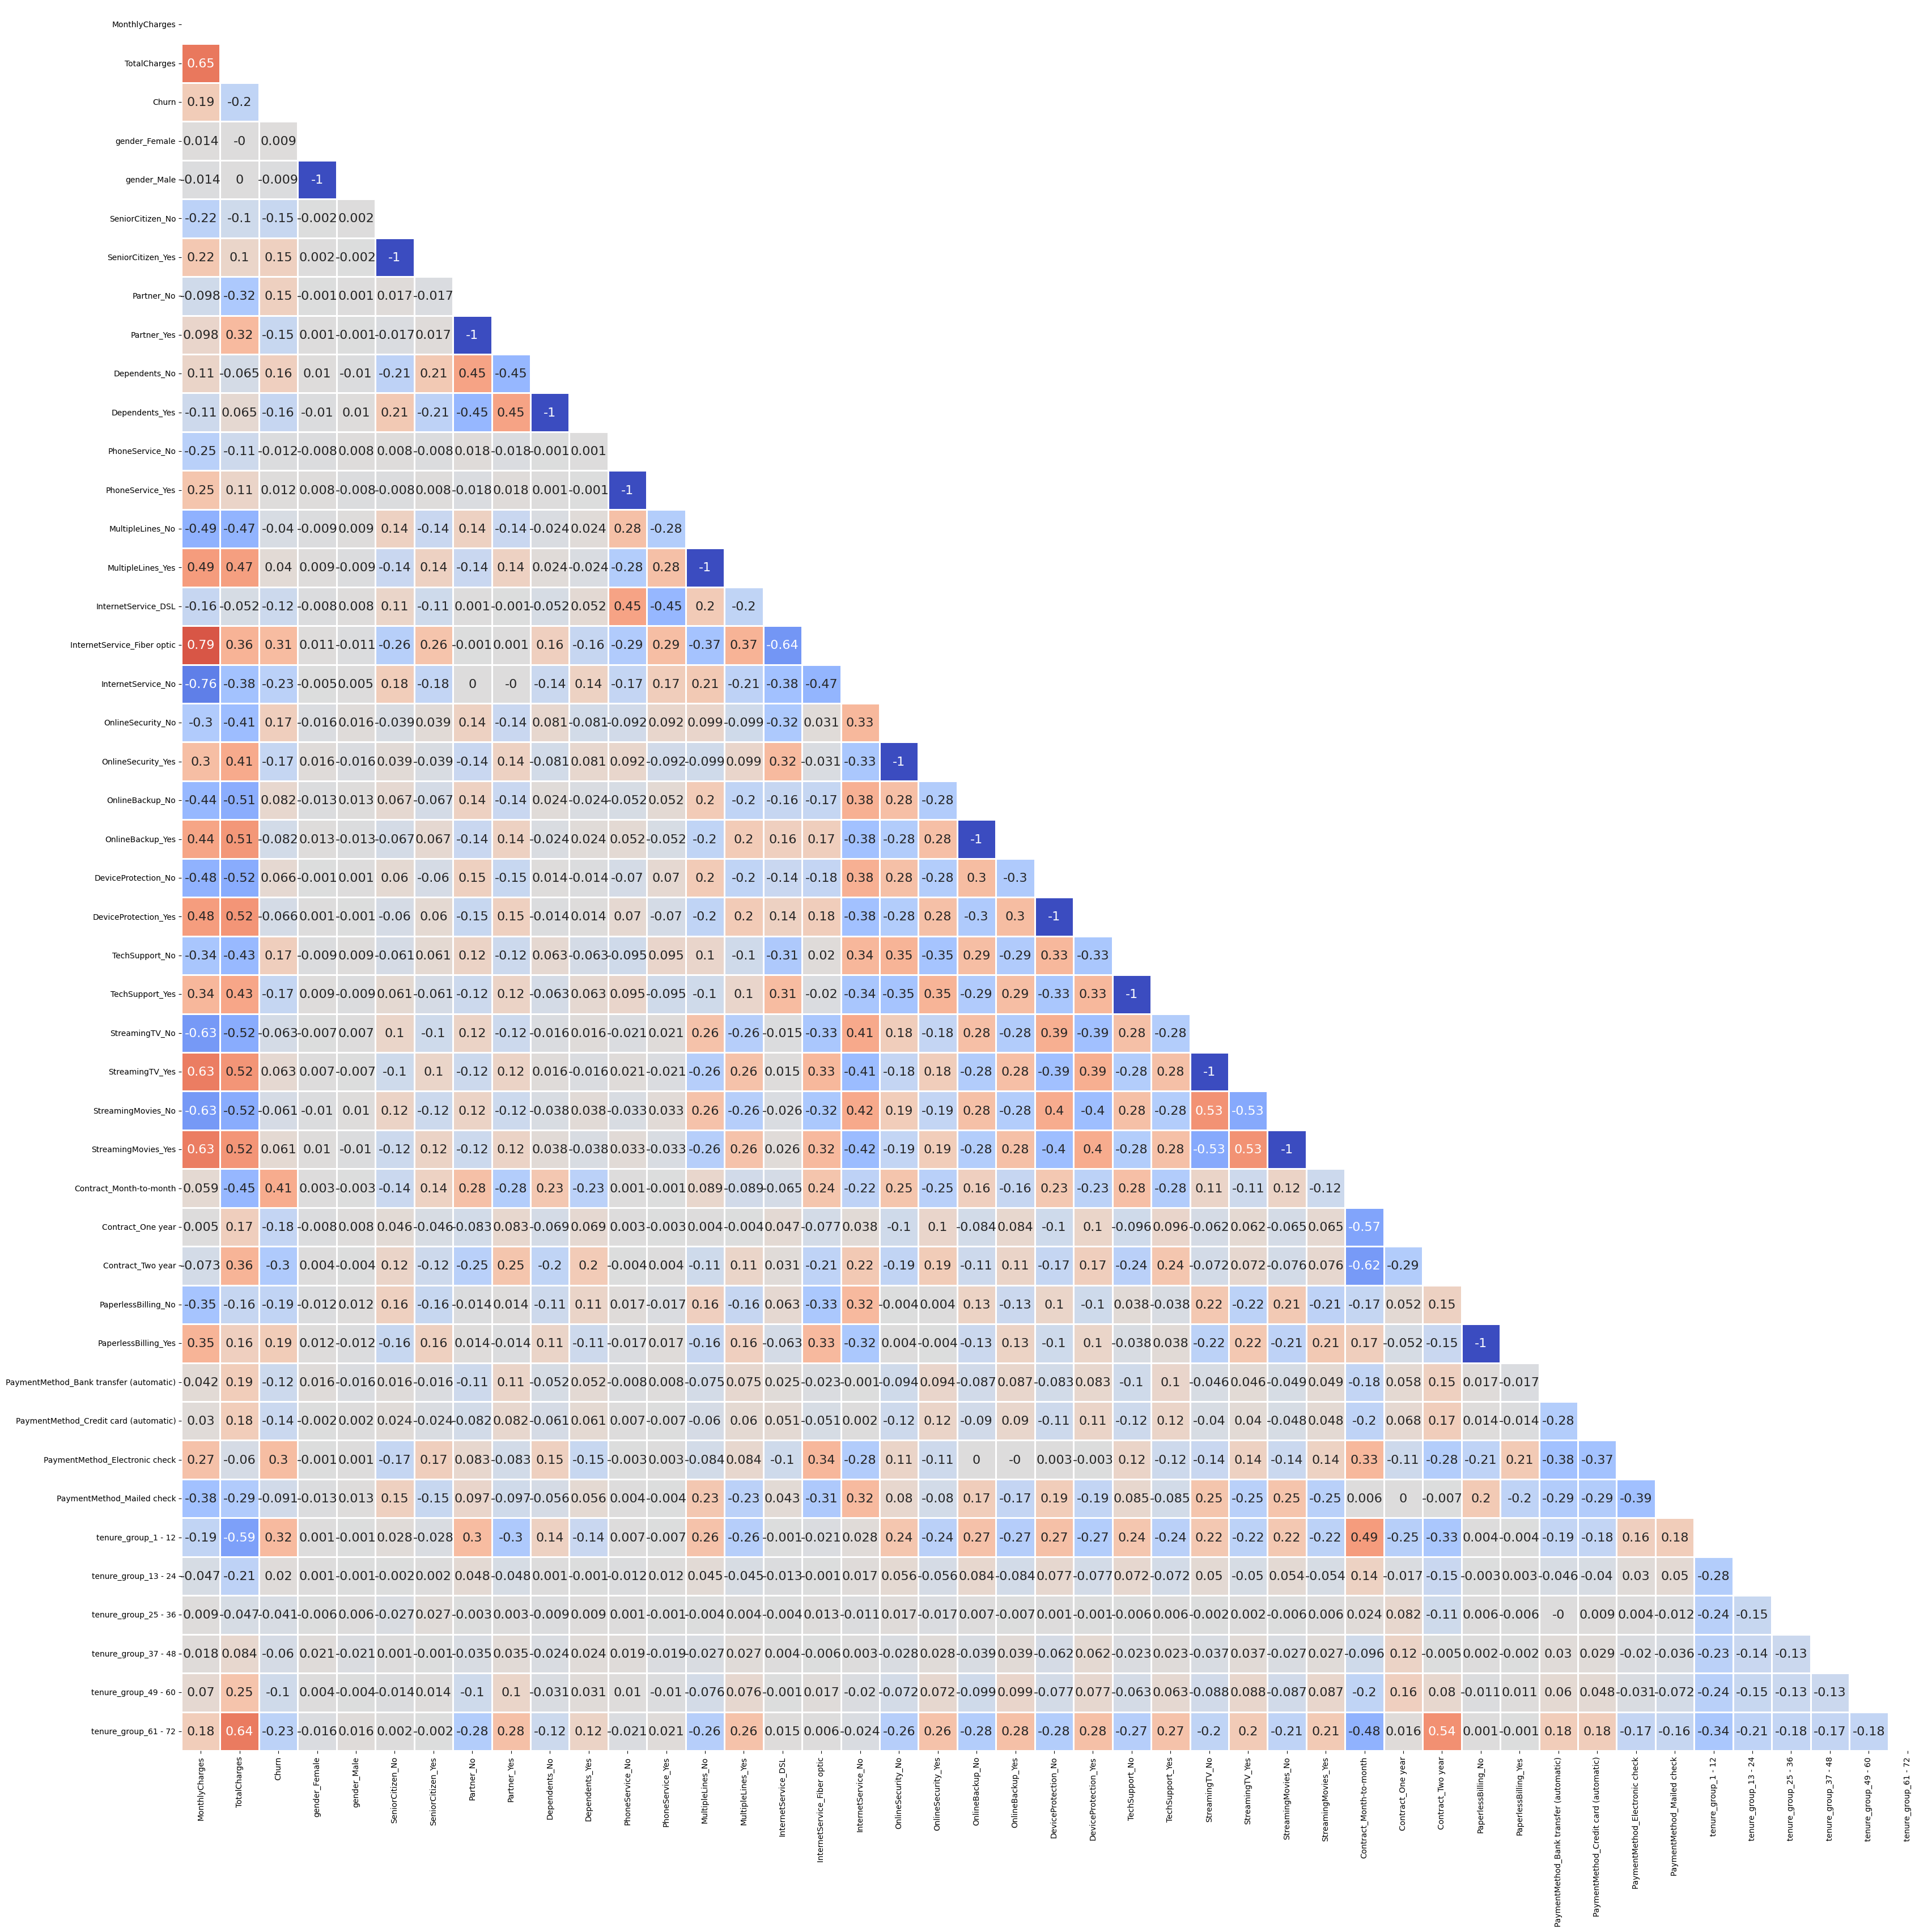

In [33]:
corr_matrix = data_dummies.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

5. Distribution of Different Attributes by Gender

In [34]:
data2_target0 = data1.loc[data1['Churn']==0]
data2_target1 = data1.loc[data1['Churn']==1]

In [35]:
def uniplot(df, col, title, hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette='bright')

    plt.show()

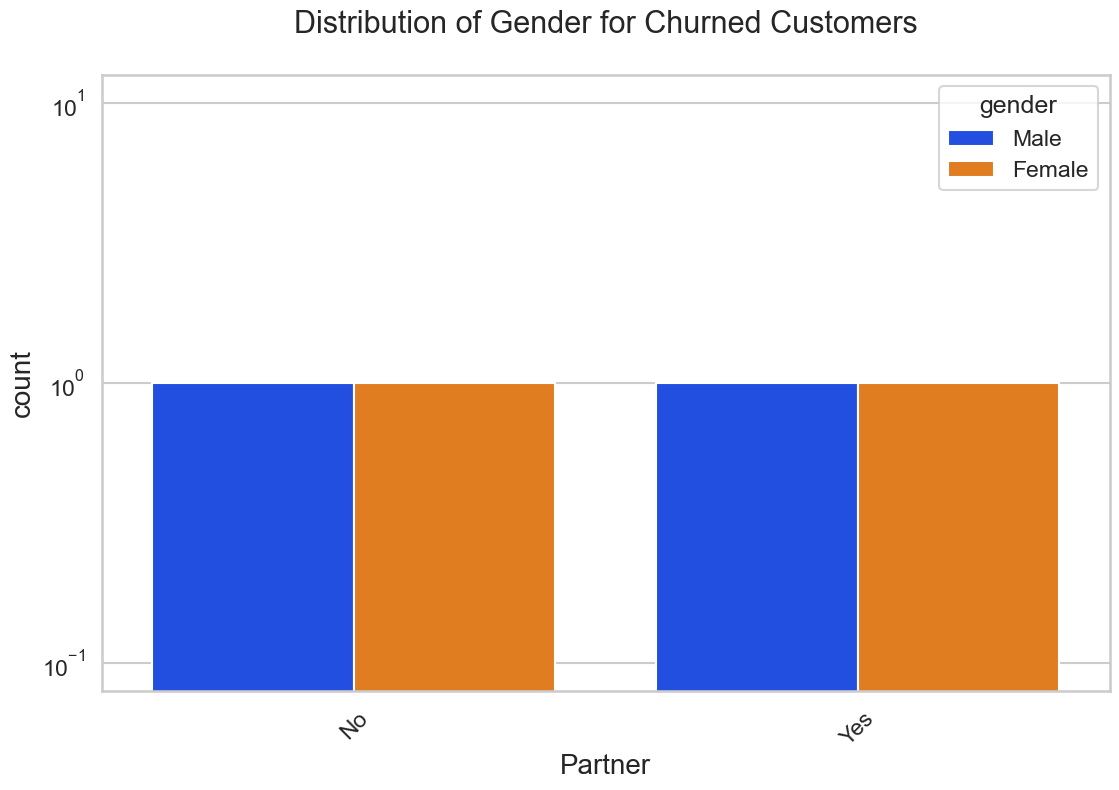

In [36]:
uniplot(df=data2_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

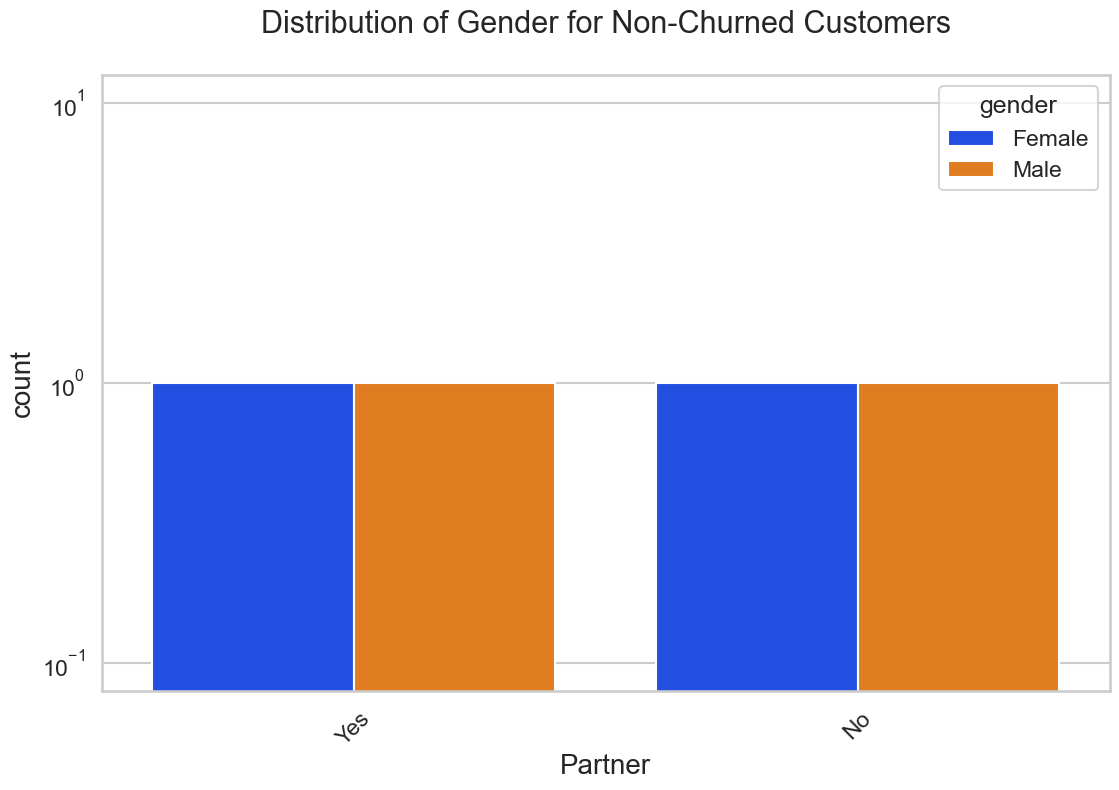

In [37]:
uniplot(df=data2_target0, col='Partner', title='Distribution of Gender for Non-Churned Customers', hue='gender')

- Female Customers with no Partner tend to Churn a little more than Male Customers
- Male and Female Customers with Partner are the most Non-Churners

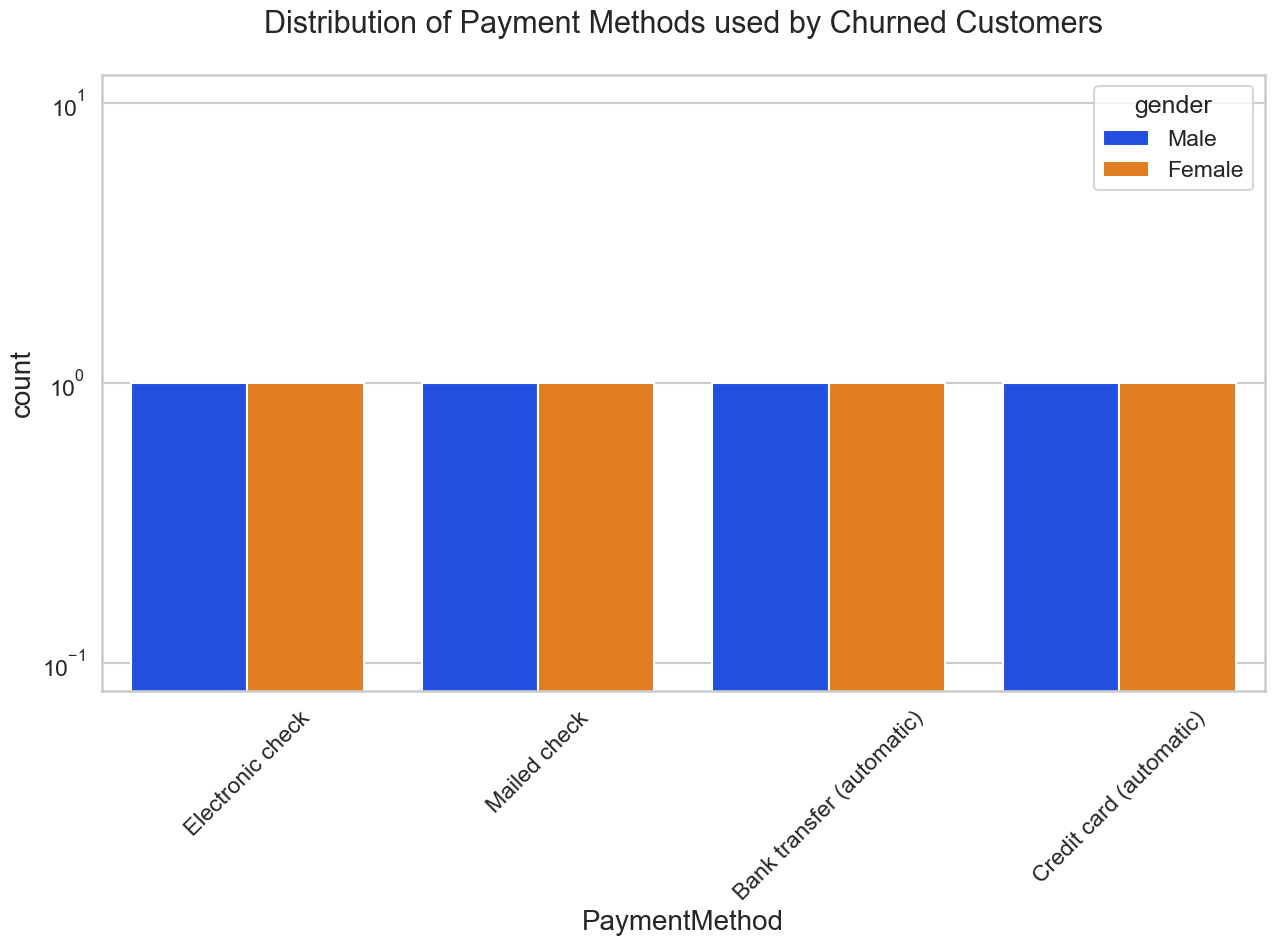

In [38]:
uniplot(df=data2_target1, col='PaymentMethod', title='Distribution of Payment Methods used by Churned Customers', hue='gender')

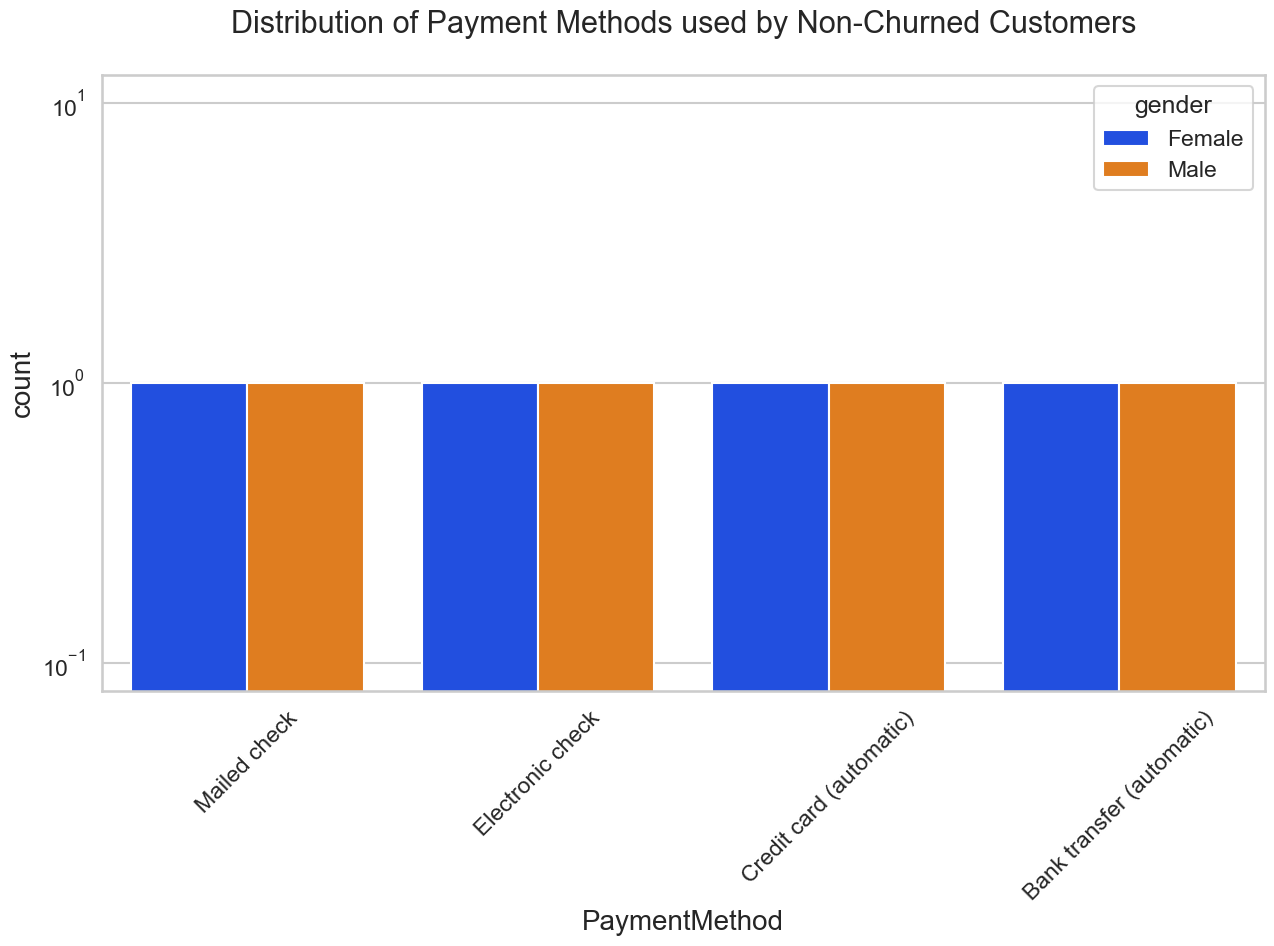

In [39]:
uniplot(df=data2_target0, col='PaymentMethod', title='Distribution of Payment Methods used by Non-Churned Customers', hue='gender')

- The most popular payment method used by Churners is 'Electronic check'
- Male Customers with payment methods of 'Mailed check' and 'Credit card (automatic)' are the least Churners

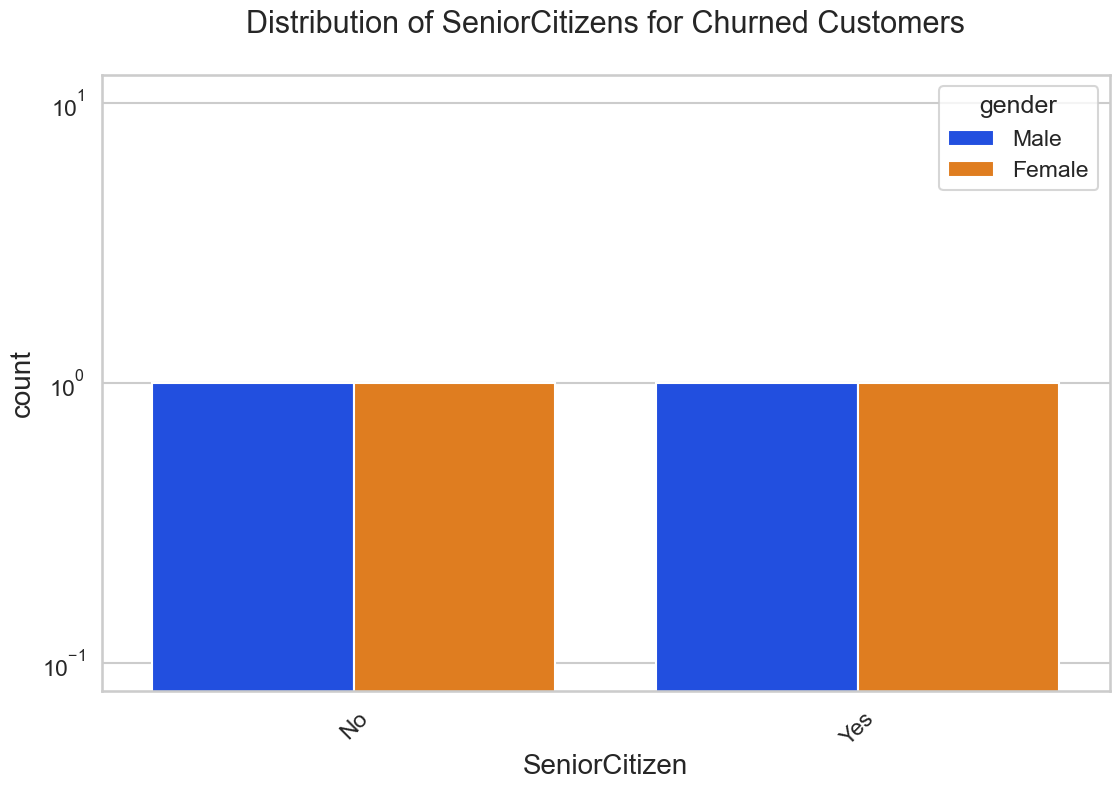

In [40]:
uniplot(data2_target1, col='SeniorCitizen', title='Distribution of SeniorCitizens for Churned Customers', hue='gender')

- Non-Senior Citizens Churn significantly than the Senior Citizens with respect to both genders

## Conclusion

Here is a brief about the derived insights gained:
- Customers that use 'Electronic check' as payment method are the highest churners
- Monthly customers are more likely to churn as they are free to go customers with no contract being tied with them
- Customers with no online security, tech support & fibre optics internet are more likely to churn
- Non-Senior Citizens are the highest churners and their counterpart, Senior Citizens are less vulnerable to churning

#### Completed 'CHURNLYTICAL_EDA'!